# TensorFlow基础

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers

physical_devices = tf.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
tf.config.experimental.set_memory_growth(physical_devices[0], True)

## 数据类型

### 数值类型

标量在 TensorFlow 是如何创建的

In [3]:
# python 语言方式创建标量
a = 1.2 
# TF 方式创建标量
aa = tf.constant(1.2)

type(a), type(aa), tf.is_tensor(aa)

(float, tensorflow.python.framework.ops.EagerTensor, True)

如果要使用 TensorFlow 提供的功能函数， 须通过 TensorFlow 规定的方式去创建张量，而不能使用 Python 语言的标准变量创建方式。

In [4]:
x = tf.constant([1,2.,3.3])
# 打印 TF 张量的相关信息                
x

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1. , 2. , 3.3], dtype=float32)>

In [5]:
# 将 TF 张量的数据导出为 numpy 数组格式
x.numpy() 

array([1. , 2. , 3.3], dtype=float32)

与标量不同，向量的定义须通过 List 容器传给 tf.constant()函数。

创建一个元素的向量：

In [6]:
# 创建一个元素的向量
a = tf.constant([1.2]) 
a, a.shape

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.2], dtype=float32)>,
 TensorShape([1]))

创建 3 个元素的向量：

In [7]:
 # 创建 3 个元素的向量
a = tf.constant([1,2, 3.])
a, a.shape

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>,
 TensorShape([3]))

定义矩阵

In [8]:
# 创建 2 行 2 列的矩阵
a = tf.constant([[1,2],[3,4]]) 
a, a.shape

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4]])>,
 TensorShape([2, 2]))

三维张量可以定义为：

In [9]:
# 创建 3 维张量
tf.constant([[[1,2],[3,4]],[[5,6],[7,8]]]) 

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])>

通过传入字符串对象即可创建字符串类型的张量

In [10]:
# 创建字符串
a = tf.constant('Hello, Deep Learning.') 
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

### 字符串类型

通过传入字符串对象即可创建字符串类型的张量

In [11]:
# 创建字符串
a = tf.constant('Hello, Deep Learning.') 
a

<tf.Tensor: shape=(), dtype=string, numpy=b'Hello, Deep Learning.'>

在 tf.strings 模块中，提供了常见的字符串类型的工具函数，如小写化 lower()、 拼接
join()、 长度 length()、 切分 split()等。

In [12]:
# 小写化字符串
tf.strings.lower(a) 

<tf.Tensor: shape=(), dtype=string, numpy=b'hello, deep learning.'>

### 布尔类型
布尔类型的张量只需要传入 Python 语言的布尔类型数据，转换成 TensorFlow 内部布尔型即可。

In [13]:
# 创建布尔类型标量
tf.constant(True) 

<tf.Tensor: shape=(), dtype=bool, numpy=True>

创建布尔类型的向量

In [14]:
 # 创建布尔类型向量
tf.constant([True, False])

<tf.Tensor: shape=(2,), dtype=bool, numpy=array([ True, False])>

需要注意的是， TensorFlow 的布尔类型和 Python 语言的布尔类型并不等价，不能通用

In [15]:
# 创建 TF 布尔张量
a = tf.constant(True) 
# TF 布尔类型张量与 python 布尔类型比较
print(a is True) 
# 仅数值比较
print(a == True) 

False
tf.Tensor(True, shape=(), dtype=bool)


## 数值精度

在创建张量时，可以指定张量的保存精度

In [16]:
# 创建指定精度的张量
tf.constant(123456789, dtype=tf.int16)

<tf.Tensor: shape=(), dtype=int16, numpy=-13035>

In [17]:
tf.constant(123456789, dtype=tf.int32)

<tf.Tensor: shape=(), dtype=int32, numpy=123456789>

对于浮点数， 高精度的张量可以表示更精准的数据，例如采用 tf.float32 精度保存π时，实际保存的数据为 3.1415927

In [18]:
import numpy as np
# 从 numpy 中导入 pi 常量
np.pi 
# 32 位
tf.constant(np.pi, dtype=tf.float32) 

<tf.Tensor: shape=(), dtype=float32, numpy=3.1415927>

如果采用 tf.float64 精度保存π，则能获得更高的精度

In [19]:
tf.constant(np.pi, dtype=tf.float64) # 64 位

<tf.Tensor: shape=(), dtype=float64, numpy=3.141592653589793>

### 读取精度

通过访问张量的 dtype 成员属性可以判断张量的保存精度

In [20]:
a = tf.constant(np.pi, dtype=tf.float16)

# 读取原有张量的数值精度
print('before:',a.dtype) 
# 如果精度不符合要求，则进行转换
if a.dtype != tf.float32: 
    # tf.cast 函数可以完成精度转换
    a = tf.cast(a,tf.float32) 
# 打印转换后的精度
print('after :',a.dtype) 

before: <dtype: 'float16'>
after : <dtype: 'float32'>


### 类型转换
系统的每个模块使用的数据类型、 数值精度可能各不相同， 对于不符合要求的张量的类型及精度， 需要通过 tf.cast 函数进行转换

In [21]:
# 创建 tf.float16 低精度张量
a = tf.constant(np.pi, dtype=tf.float16) 
# 转换为高精度张量
tf.cast(a, tf.double) 

<tf.Tensor: shape=(), dtype=float64, numpy=3.140625>

进行类型转换时，需要保证转换操作的合法性， 例如将高精度的张量转换为低精度的张量时，可能发生数据溢出隐患：

In [22]:
a = tf.constant(123456789, dtype=tf.int32)
# 转换为低精度整型
tf.cast(a, tf.int16) 

<tf.Tensor: shape=(), dtype=int16, numpy=-13035>

布尔类型与整型之间相互转换也是合法的， 是比较常见的操作

In [23]:
a = tf.constant([True, False])
# 布尔类型转整型
tf.cast(a, tf.int32) 

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 0])>

一般默认 0 表示 False， 1 表示 True，在 TensorFlow 中，将非 0 数字都视为 True，

In [24]:
a = tf.constant([-1, 0, 1, 2])
# 整型转布尔类型
tf.cast(a, tf.bool) 

<tf.Tensor: shape=(4,), dtype=bool, numpy=array([ True, False,  True,  True])>

## 待优化张量

TensorFlow 增加了一种专门的数据类型来支持梯度信息的记录： tf.Variable。 tf.Variable 类型在普通的张量类型基础上添加了 name， trainable 等属性来支持计算图的构建。

In [25]:
# 创建 TF 张量
a = tf.constant([-1, 0, 1, 2]) 
# 转换为 Variable 类型
aa = tf.Variable(a) 
# Variable 类型张量的属性
aa.name, aa.trainable 

('Variable:0', True)

name 属性用于命名计算图中的变量，这套命名体系是 TensorFlow 内部维护的， 一般不需要用户关注 name 属性；   
trainable属性表征当前张量是否需要被优化，创建 Variable 对象时是默认启用优化标志，可以设置trainable=False 来设置张量不需要优化。

In [26]:
# 直接创建 Variable 张量
tf.Variable([[1,2],[3,4]]) 

<tf.Variable 'Variable:0' shape=(2, 2) dtype=int32, numpy=
array([[1, 2],
       [3, 4]])>

## 创建张量

### 从数组、列表对象创建

通过 tf.convert_to_tensor 函数可以创建新 Tensor，并将保存在 Python List 对象或者Numpy Array 对象中的数据导入到新 Tensor 中。

In [27]:
# 从列表创建张量
tf.convert_to_tensor([1,2.]) 

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

In [28]:
# 从数组中创建张量
tf.convert_to_tensor(np.array([[1,2.],[3,4]])) 

<tf.Tensor: shape=(2, 2), dtype=float64, numpy=
array([[1., 2.],
       [3., 4.]])>

### 创建全0或全1张量

In [29]:
# 创建全 0，全 1 的标量
tf.zeros([]),tf.ones([]) 

(<tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.0>)

In [30]:
# 创建全 0，全 1 的向量
tf.zeros([1]),tf.ones([1]) 

(<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>)

创建全 0 的矩阵

In [31]:
# 创建全 0 矩阵，指定 shape 为 2 行 2 列
tf.zeros([2,2]) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.]], dtype=float32)>

创建全 1 的矩阵

In [32]:
# 创建全 1 矩阵，指定 shape 为 3 行 2 列
tf.ones([3,2]) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

通过 tf.zeros_like, tf.ones_like 可以方便地新建与某个张量 shape 一致， 且内容为全 0 或全 1 的张量。

In [33]:
# 创建一个矩阵
a = tf.ones([2,3]) 
# 创建一个与 a 形状相同，但是全 0 的新矩阵
tf.zeros_like(a) 

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>

创建与张量A形状一样的全 1 张量

In [34]:
# 创建一个矩阵
a = tf.zeros([3,2]) 
# 创建一个与 a 形状相同，但是全 1 的新矩阵
tf.ones_like(a) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

### 创建自定义数值张量

通过 tf.fill(shape, value)可以创建全为自定义数值 value 的张量，形状由 shape 参数指定。

In [35]:
# 创建-1 的标量
tf.fill([], -1) 

<tf.Tensor: shape=(), dtype=int32, numpy=-1>

In [36]:
# 创建-1 的向量
tf.fill([1], -1) 

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([-1])>

In [37]:
# 创建 2 行 2 列，元素全为 99 的矩阵
tf.fill([2,2], 99) 

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[99, 99],
       [99, 99]])>

### 创建已知分布的张量

通过 tf.random.normal(shape, mean=0.0, stddev=1.0)可以创建形状为 shape，均值为mean，标准差为 stddev 的正态分布$\mathcal{N}(mean, stddev^2)$。

In [38]:
# 创建标准正态分布的张量
tf.random.normal([2,2]) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.1888224 , -0.02389981],
       [ 0.03134287, -2.2917395 ]], dtype=float32)>

In [39]:
# 创建均值为 1，标准差为 2 的正态分布的张量
tf.random.normal([2,2], mean=1,stddev=2) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.4092561, 0.9695162],
       [1.1337255, 4.5322676]], dtype=float32)>

通过 tf.random.uniform(shape, minval=0, maxval=None, dtype=tf.float32)可以创建采样自[minval, maxval)区间的均匀分布的张量

In [40]:
# 创建采样自[0,1)均匀分布的矩阵
tf.random.uniform([3,2]) 

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0.5258516 , 0.7903775 ],
       [0.1351409 , 0.00282764],
       [0.3242854 , 0.8311529 ]], dtype=float32)>

In [41]:
# 创建采样自[0,10)均匀分布的矩阵
tf.random.uniform([2,2],maxval=10) 

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[5.6238985, 5.867996 ],
       [4.4086814, 2.8135598]], dtype=float32)>

如果需要均匀采样整形类型的数据，必须指定采样区间的最大值 maxval 参数，同时指定数据类型为 tf.int*型

In [42]:
# 创建采样自[0,100)均匀分布的整型矩阵
tf.random.uniform([2,2],maxval=100,dtype=tf.int32)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[13, 41],
       [99, 42]])>

### 创建序列

tf.range(limit, delta=1)可以创建[0, limit)之间，步长为 delta 的整型序列，不包含 limit 本身。

In [122]:
# 0~10，不包含 10
tf.range(10) 

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [118]:
# 创建 0~10，步长为 2 的整形序列
tf.range(10,delta=2)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 2, 4, 6, 8])>

In [119]:
tf.range(1,10,delta=2) # 1~10

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([1, 3, 5, 7, 9])>

## 张量的典型应用

### 标量

In [46]:
# 随机模拟网络输出
out = tf.random.uniform([4,10]) 
# 随机构造样本真实标签
y = tf.constant([2,3,2,0]) 
# one-hot 编码
y = tf.one_hot(y, depth=10) 
# 计算每个样本的 MSE
loss = tf.keras.losses.mse(y, out) 
# 平均 MSE,loss 应是标量
loss = tf.reduce_mean(loss) 
print(loss)

tf.Tensor(0.37901962, shape=(), dtype=float32)


### 向量

考虑 2 个输出节点的网络层， 我们创建长度为 2 的偏置向量b，并累加在每个输出节点上：

In [47]:
# z=wx,模拟获得激活函数的输入 z
z = tf.random.normal([4,2])
# 创建偏置向量
b = tf.zeros([2])
# 累加上偏置向量
z = z + b 
z

<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-0.4624195 ,  0.13952534],
       [-0.12484407, -2.4303684 ],
       [ 1.3730634 , -0.8032931 ],
       [ 1.1924285 ,  0.43222842]], dtype=float32)>

创建输入节点数为 4，输出节点数为 3 的线性层网络，那么它的偏置向量 b 的长度应为 3

In [48]:
# 创建一层 Wx+b，输出节点为 3
fc = tf.keras.layers.Dense(3) 
# 通过 build 函数创建 W,b 张量，输入节点为 4
fc.build(input_shape=(2,4))
# 查看偏置向量
fc.bias 

<tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

### 矩阵

In [49]:
# 2 个样本，特征长度为 4 的张量
x = tf.random.normal([2,4]) 
# 定义 W 张量
w = tf.ones([4,3])
# 定义 b 张量
b = tf.zeros([3]) 
# X@W+b 运算
o = x@w+b
o

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 0.01671451,  0.01671451,  0.01671451],
       [-3.8515904 , -3.8515904 , -3.8515904 ]], dtype=float32)>

In [50]:
# 定义全连接层的输出节点为 3
fc = tf.keras.layers.Dense(3) 
# 定义全连接层的输入节点为 4
fc.build(input_shape=(2,4)) 
# 查看权值矩阵 W
fc.kernel 

<tf.Variable 'kernel:0' shape=(4, 3) dtype=float32, numpy=
array([[-0.7577739 ,  0.12952065, -0.73565316],
       [-0.39864308,  0.7394718 , -0.6624279 ],
       [ 0.10645366, -0.6937115 , -0.47146454],
       [-0.88740575,  0.5236336 , -0.00209475]], dtype=float32)>

### 三维张量

In [51]:
# 自动加载 IMDB 电影评价数据集
(x_train,y_train),(x_test,y_test)=keras.datasets.imdb.load_data(num_words=10000)
# 将句子填充、截断为等长 80 个单词的句子
x_train = keras.preprocessing.sequence.pad_sequences(x_train,maxlen=80)
x_train.shape

17465344/17464789 [==============================] - 1835s 105us/step


(25000, 80)

可以看到 x_train 张量的 shape 为[25000,80]，其中 25000 表示句子个数， 80 表示每个句子共 80 个单词，每个单词使用数字编码方式表示。

我们通过 layers.Embedding 层将数字编码的单词转换为长度为 100 个词向量：

In [52]:
# 创建词向量 Embedding 层类
embedding = tf.keras.layers.Embedding(10000, 100)
# 将数字编码的单词转换为词向量
out = embedding(x_train)
out.shape

TensorShape([25000, 80, 100])

可以看到，经过 Embedding 层编码后，句子张量的 shape 变为[25000,80,100]，其中 100 表示每个单词编码为长度是 100 的向量。

### 四维张量

In [53]:
# 创建 32x32 的彩色图片输入，个数为 4
x = tf.random.normal([4,32,32,3])
# 创建卷积神经网络
layer = layers.Conv2D(16, kernel_size=3)
# 前向计算
out = layer(x) 
# 输出大小
out.shape 

TensorShape([4, 30, 30, 16])

In [54]:
# 访问卷积核张量
layer.kernel.shape 

TensorShape([3, 3, 3, 16])

## 索引与切片
### 索引

In [55]:
# 创建4维张量
x = tf.random.normal([4,32,32,3]) 

In [56]:
# 取第 1 张图片的数据
x[0]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[ 0.45955303, -0.56873804, -0.8339873 ],
        [-1.4640464 ,  0.53605866,  0.9701097 ],
        [-0.2470666 ,  1.843825  , -0.15956783],
        ...,
        [ 1.3349462 ,  2.4353788 , -0.7806732 ],
        [ 1.4113492 , -0.45578766, -0.43716997],
        [-0.00427458, -0.15368925, -0.08753973]],

       [[-1.4322798 ,  1.5671097 , -0.7926335 ],
        [-0.34856343, -0.78616494,  0.37570953],
        [-0.8761477 , -0.489268  ,  1.1489543 ],
        ...,
        [-2.7679646 ,  1.2941147 ,  2.562366  ],
        [ 0.92435896, -0.77067345, -0.28982556],
        [-0.8151651 ,  0.16999994,  0.08453326]],

       [[-0.8493824 , -1.1604099 ,  1.995916  ],
        [ 0.3452432 , -0.5338352 ,  1.1582074 ],
        [ 0.64027375,  0.2873368 , -0.5787885 ],
        ...,
        [-0.16726731, -2.206939  ,  0.30263126],
        [ 0.00785957, -0.9452333 ,  0.601011  ],
        [ 0.00447249,  0.48913264, -0.55502737]],

       ...,

       

In [57]:
# 取第 1 张图片的第 2 行
x[0][1]

<tf.Tensor: shape=(32, 3), dtype=float32, numpy=
array([[-1.43227983e+00,  1.56710970e+00, -7.92633474e-01],
       [-3.48563433e-01, -7.86164939e-01,  3.75709534e-01],
       [-8.76147687e-01, -4.89268005e-01,  1.14895427e+00],
       [-1.60098732e-01, -4.24722314e-01, -5.07294238e-01],
       [-5.21497011e-01,  4.28616583e-01, -9.51543868e-01],
       [-9.37260330e-01, -1.61395629e-03, -5.88420630e-01],
       [-2.69775361e-01,  1.63375854e+00, -1.73501655e-01],
       [-1.28708577e+00, -9.07485425e-01, -1.69515502e+00],
       [-1.04954875e+00,  1.37895858e-02,  1.99829906e-01],
       [ 5.11864871e-02,  1.81521273e+00, -8.25776011e-02],
       [-7.62189448e-01,  1.00812304e+00, -4.04455125e-01],
       [-4.24095750e-01, -2.16365289e-02,  7.08870962e-03],
       [ 1.02510178e+00,  3.25216323e-01, -3.68973583e-01],
       [-1.43315864e+00,  5.47089577e-01,  2.15946484e+00],
       [ 6.12825632e-01, -3.35819215e-01,  8.19235563e-01],
       [-1.30953360e+00,  4.23296243e-02, -1.205701

In [58]:
# 取第 1 张图片，第 2 行，第 3 列的数据
x[0][1][2]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.8761477, -0.489268 ,  1.1489543], dtype=float32)>

In [59]:
# 取第 3 张图片，第 2 行，第 1 列的像素， B 通道(第 2 个通道)颜色强度值
x[2][1][0][1]

<tf.Tensor: shape=(), dtype=float32, numpy=1.537185>

In [60]:
# 取第 2 张图片，第 10 行，第 3 列的数据
x[1,9,2]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.17931943, -0.97065234,  1.1103375 ], dtype=float32)>

### 切片

In [61]:
# 读取第 2,3 张图片
x[1:3]

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[ 4.33491379e-01,  9.33678523e-02, -8.05982649e-01],
         [ 1.53314602e+00,  8.01011860e-01,  1.48967886e+00],
         [-7.69349158e-01, -1.91894805e+00, -8.79350007e-01],
         ...,
         [-7.22750783e-01, -4.95494545e-01, -1.16098845e+00],
         [-2.98808813e-01,  1.45454153e-01,  6.50596201e-01],
         [-1.54435015e+00, -7.12436795e-01, -6.54263020e-01]],

        [[ 2.99785823e-01, -3.30926403e-02, -2.86224246e-01],
         [-3.75564814e-01, -8.72428566e-02,  1.76834706e-02],
         [ 1.22331786e+00, -1.34728566e-01,  1.15048915e-01],
         ...,
         [-2.98450768e-01,  5.24518490e-01, -8.32656175e-02],
         [-6.56713963e-01, -3.38547289e-01,  5.89079857e-01],
         [ 2.25328326e-01,  3.88649702e-01, -5.51545978e-01]],

        [[ 1.27956200e+00,  2.84301024e-02, -5.71187556e-01],
         [-8.18153560e-01, -1.38772070e+00, -1.61951053e+00],
         [-1.94203246e+00, -2.40925610e-01, 

In [62]:
# 读取第一张图片
x[0,::] 

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[ 0.45955303, -0.56873804, -0.8339873 ],
        [-1.4640464 ,  0.53605866,  0.9701097 ],
        [-0.2470666 ,  1.843825  , -0.15956783],
        ...,
        [ 1.3349462 ,  2.4353788 , -0.7806732 ],
        [ 1.4113492 , -0.45578766, -0.43716997],
        [-0.00427458, -0.15368925, -0.08753973]],

       [[-1.4322798 ,  1.5671097 , -0.7926335 ],
        [-0.34856343, -0.78616494,  0.37570953],
        [-0.8761477 , -0.489268  ,  1.1489543 ],
        ...,
        [-2.7679646 ,  1.2941147 ,  2.562366  ],
        [ 0.92435896, -0.77067345, -0.28982556],
        [-0.8151651 ,  0.16999994,  0.08453326]],

       [[-0.8493824 , -1.1604099 ,  1.995916  ],
        [ 0.3452432 , -0.5338352 ,  1.1582074 ],
        [ 0.64027375,  0.2873368 , -0.5787885 ],
        ...,
        [-0.16726731, -2.206939  ,  0.30263126],
        [ 0.00785957, -0.9452333 ,  0.601011  ],
        [ 0.00447249,  0.48913264, -0.55502737]],

       ...,

       

In [63]:
x[:,0:28:2,0:28:2,:]

<tf.Tensor: shape=(4, 14, 14, 3), dtype=float32, numpy=
array([[[[ 4.5955303e-01, -5.6873804e-01, -8.3398730e-01],
         [-2.4706660e-01,  1.8438250e+00, -1.5956783e-01],
         [ 4.0498134e-02, -1.9976576e-01,  1.5415040e+00],
         ...,
         [ 1.1148669e+00, -1.3704027e-01, -6.3365805e-01],
         [-2.2224917e-01,  2.9397890e-01,  1.5628747e+00],
         [-4.2642805e-01,  5.8806157e-01,  1.3426386e+00]],

        [[-8.4938240e-01, -1.1604099e+00,  1.9959160e+00],
         [ 6.4027375e-01,  2.8733680e-01, -5.7878852e-01],
         [-6.2796217e-01,  2.9716325e-01,  2.2501558e-01],
         ...,
         [ 9.1967426e-02,  1.1664637e+00, -2.1483690e-01],
         [-9.2703837e-01,  6.1517489e-01, -1.5849414e+00],
         [-5.5118215e-01, -1.1191646e+00, -2.6193109e+00]],

        [[-3.7292811e-01, -1.6749377e+00,  2.6646337e-01],
         [ 1.5495358e+00, -1.3566215e+00, -3.5010934e-01],
         [-9.6735191e-01,  1.0406433e+00,  7.3237383e-01],
         ...,
         [-5.

In [64]:
# 考虑一个 0~9 的简单序列向量， 逆序取到第 1 号元素，不包含第 1 号
# 创建 0~9 向量
x = tf.range(9) 
# 从 8 取到 0，逆序，不包含 0
x[8:0:-1] 

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1])>

In [65]:
# 逆序全部元素
x[::-1] 

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([8, 7, 6, 5, 4, 3, 2, 1, 0])>

In [66]:
# 逆序间隔采样
x[::-2] 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([8, 6, 4, 2, 0])>

读取每张图片的所有通道，其中行按着逆序隔行采样，列按着逆序隔行采样

In [67]:
x = tf.random.normal([4,32,32,3])
# 行、列逆序间隔采样
x[0,::-2,::-2] 

<tf.Tensor: shape=(16, 16, 3), dtype=float32, numpy=
array([[[-1.15736258e+00, -1.26402211e+00,  1.73724627e+00],
        [ 2.92429614e+00,  1.08445540e-01, -1.41567564e+00],
        [ 1.71028122e-01,  1.49538851e+00,  1.88453174e+00],
        [-5.45882396e-02, -3.59379470e-01,  1.70848608e-01],
        [ 4.60800916e-01, -9.39424057e-03,  5.61639905e-01],
        [-5.69217622e-01, -1.27675653e+00, -1.51925385e-01],
        [ 2.81895310e-01,  6.33441567e-01, -4.45539504e-01],
        [ 3.82522285e-01, -1.21572053e+00, -1.55759501e+00],
        [-1.04928233e-01, -8.83344829e-01, -1.02339834e-01],
        [ 1.72088885e+00, -5.98420501e-02,  2.09680706e-01],
        [-7.50160992e-01,  2.53700823e-01, -1.09639633e+00],
        [ 7.27632165e-01,  7.53250420e-01, -2.07941726e-01],
        [-1.05448592e+00, -5.05401678e-02,  6.43583357e-01],
        [ 1.08491719e+00, -4.32762951e-01,  4.41738099e-01],
        [-1.84912097e+00,  6.43398225e-01, -7.99777266e-03],
        [ 1.23035765e+00,  7.079

In [68]:
# 取 G 通道数据
x[:,:,:,1] 

<tf.Tensor: shape=(4, 32, 32), dtype=float32, numpy=
array([[[ 0.7384085 , -1.0172521 ,  0.67011786, ..., -1.2960336 ,
         -0.35631618,  0.9209951 ],
        [ 0.10220022,  0.24430929,  0.69145817, ...,  2.4870512 ,
          0.3097786 , -0.22038151],
        [-0.5645886 , -1.3004446 , -1.3427638 , ..., -1.6531106 ,
          0.90061444, -0.33388388],
        ...,
        [ 2.2778935 ,  1.5053611 ,  0.00899696, ...,  0.27249464,
          0.32615608, -0.24787058],
        [ 0.5423423 ,  0.8695914 ,  0.91255164, ..., -0.82138586,
          0.8151879 , -1.5686389 ],
        [-0.4389052 ,  0.7079257 ,  1.0835222 , ...,  0.10844554,
          0.19494331, -1.2640221 ]],

       [[ 0.05813165, -0.6087487 ,  0.9199872 , ...,  1.5646112 ,
          0.05688234, -0.70478016],
        [-1.4464221 ,  0.64029914, -0.6728697 , ...,  0.49225974,
          0.536248  ,  1.7869569 ],
        [-0.43014526,  0.14348151,  0.23760927, ..., -1.1801233 ,
          0.850325  ,  0.27860615],
        ...,
 

In [69]:
# 读取第 1~2 张图片的 G/B 通道数据
# 高宽维度全部采集
x[0:2,...,1:] 

<tf.Tensor: shape=(2, 32, 32, 2), dtype=float32, numpy=
array([[[[ 0.7384085 ,  0.05093743],
         [-1.0172521 ,  0.12457129],
         [ 0.67011786,  1.4608454 ],
         ...,
         [-1.2960336 ,  2.2058644 ],
         [-0.35631618, -0.20160948],
         [ 0.9209951 ,  0.5521141 ]],

        [[ 0.10220022, -0.37733713],
         [ 0.24430929,  0.54064673],
         [ 0.69145817, -1.9748056 ],
         ...,
         [ 2.4870512 , -0.1293749 ],
         [ 0.3097786 ,  0.3784173 ],
         [-0.22038151, -0.77224135]],

        [[-0.5645886 , -1.0028148 ],
         [-1.3004446 ,  0.9932478 ],
         [-1.3427638 , -0.37779257],
         ...,
         [-1.6531106 ,  0.8154494 ],
         [ 0.90061444, -0.69121426],
         [-0.33388388, -0.13343966]],

        ...,

        [[ 2.2778935 ,  0.16448832],
         [ 1.5053611 , -0.61757314],
         [ 0.00899696, -1.5609368 ],
         ...,
         [ 0.27249464, -0.24558233],
         [ 0.32615608, -1.0854064 ],
         [-0.2478

In [70]:
# 读取最后 2 张图片
# 高、宽、通道维度全部采集，等价于 x[2:]
x[2:,...] 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[-2.89683014e-01, -3.53052646e-01, -7.75156081e-01],
         [-1.07273746e+00,  1.42974436e-01,  8.60382199e-01],
         [-1.41797531e+00, -9.82711554e-01,  7.36482739e-01],
         ...,
         [-5.15544951e-01,  3.29833001e-01, -1.71242142e+00],
         [-1.04939413e+00, -1.02445388e+00,  6.00696355e-02],
         [ 1.67007744e+00,  7.71070361e-01,  3.60129029e-01]],

        [[ 3.80211353e-01, -1.26440978e+00,  1.15935370e-01],
         [ 7.33214080e-01,  1.36759531e+00, -1.76750511e-01],
         [ 4.74509090e-01,  4.74009603e-01, -1.64037085e+00],
         ...,
         [-1.72164059e+00,  5.56967199e-01, -3.46796304e-01],
         [ 1.10082567e+00, -1.80738121e-01,  5.53956687e-01],
         [-1.23032129e+00,  1.63108861e+00, -6.55415416e-01]],

        [[-1.45500913e-01,  6.25565469e-01, -1.57052422e+00],
         [-1.12803839e-01,  1.76787317e+00, -2.74906214e-03],
         [-8.11106503e-01,  1.12009749e-01, 

In [71]:
# 读取 R/G 通道数据
# 所有样本，所有高、宽的前 2 个通道
x[...,:2] 

<tf.Tensor: shape=(4, 32, 32, 2), dtype=float32, numpy=
array([[[[ 0.10333468,  0.7384085 ],
         [-0.41819686, -1.0172521 ],
         [ 0.4997576 ,  0.67011786],
         ...,
         [-1.5872393 , -1.2960336 ],
         [ 0.33524367, -0.35631618],
         [-0.3673262 ,  0.9209951 ]],

        [[ 0.7952563 ,  0.10220022],
         [-1.4276055 ,  0.24430929],
         [ 0.44909286,  0.69145817],
         ...,
         [-1.355191  ,  2.4870512 ],
         [-0.72799176,  0.3097786 ],
         [ 0.54462767, -0.22038151]],

        [[-1.1026012 , -0.5645886 ],
         [-1.5042404 , -1.3004446 ],
         [ 1.4708247 , -1.3427638 ],
         ...,
         [ 1.2405076 , -1.6531106 ],
         [-0.37359068,  0.90061444],
         [ 0.3714719 , -0.33388388]],

        ...,

        [[ 0.23564924,  2.2778935 ],
         [ 0.34136614,  1.5053611 ],
         [ 0.38284606,  0.00899696],
         ...,
         [-0.16830471,  0.27249464],
         [ 2.5276778 ,  0.32615608],
         [ 0.6051

## 维度变换

### 改变视图

In [72]:
# 生成向量
x=tf.range(96)
# 改变 x 的视图，获得 4D 张量，存储并未改变
x=tf.reshape(x,[2,4,4,3]) 
x

<tf.Tensor: shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]])>

### 改变视图

我们通过 tf.range()模拟生成一个向量数据，并通过 tf.reshape 视图改变函数产生不同的视图

In [73]:
# 生成向量
x = tf.range(96) 
# 改变 x 的视图，获得 4D 张量，存储并未改变
x = tf.reshape(x,[2,4,4,3]) 
x

<tf.Tensor: shape=(2, 4, 4, 3), dtype=int32, numpy=
array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17],
         [18, 19, 20],
         [21, 22, 23]],

        [[24, 25, 26],
         [27, 28, 29],
         [30, 31, 32],
         [33, 34, 35]],

        [[36, 37, 38],
         [39, 40, 41],
         [42, 43, 44],
         [45, 46, 47]]],


       [[[48, 49, 50],
         [51, 52, 53],
         [54, 55, 56],
         [57, 58, 59]],

        [[60, 61, 62],
         [63, 64, 65],
         [66, 67, 68],
         [69, 70, 71]],

        [[72, 73, 74],
         [75, 76, 77],
         [78, 79, 80],
         [81, 82, 83]],

        [[84, 85, 86],
         [87, 88, 89],
         [90, 91, 92],
         [93, 94, 95]]]])>

In [74]:
# 获取张量的维度数和形状列表
x.ndim,x.shape 

(4, TensorShape([2, 4, 4, 3]))

通过 tf.reshape(x, new_shape)，可以将张量的视图任意地合法改变

In [75]:
tf.reshape(x,[2,-1])

<tf.Tensor: shape=(2, 48), dtype=int32, numpy=
array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,
        32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
        64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79,
        80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]])>

In [76]:
 tf.reshape(x,[2,4,12])

<tf.Tensor: shape=(2, 4, 12), dtype=int32, numpy=
array([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
        [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
        [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]],

       [[48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
        [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
        [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]]])>

In [77]:
tf.reshape(x,[2,-1,3])

<tf.Tensor: shape=(2, 16, 3), dtype=int32, numpy=
array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17],
        [18, 19, 20],
        [21, 22, 23],
        [24, 25, 26],
        [27, 28, 29],
        [30, 31, 32],
        [33, 34, 35],
        [36, 37, 38],
        [39, 40, 41],
        [42, 43, 44],
        [45, 46, 47]],

       [[48, 49, 50],
        [51, 52, 53],
        [54, 55, 56],
        [57, 58, 59],
        [60, 61, 62],
        [63, 64, 65],
        [66, 67, 68],
        [69, 70, 71],
        [72, 73, 74],
        [75, 76, 77],
        [78, 79, 80],
        [81, 82, 83],
        [84, 85, 86],
        [87, 88, 89],
        [90, 91, 92],
        [93, 94, 95]]])>

### 增、删维度

In [78]:
# 产生矩阵
x = tf.random.uniform([28,28],maxval=10,dtype=tf.int32)
x

<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[1, 8, 3, 0, 8, 0, 1, 3, 2, 3, 3, 0, 8, 7, 9, 5, 4, 8, 1, 5, 4, 9,
        5, 3, 5, 1, 6, 3],
       [7, 9, 8, 8, 8, 9, 1, 6, 5, 9, 2, 7, 6, 3, 2, 7, 6, 2, 9, 8, 5, 2,
        7, 2, 2, 0, 0, 8],
       [8, 7, 9, 2, 2, 2, 4, 3, 9, 1, 1, 5, 9, 9, 3, 0, 9, 3, 7, 3, 0, 9,
        4, 4, 5, 6, 9, 9],
       [8, 3, 2, 7, 9, 9, 7, 4, 5, 4, 4, 9, 9, 4, 4, 6, 0, 2, 0, 1, 1, 7,
        3, 7, 9, 3, 4, 9],
       [3, 7, 7, 8, 5, 2, 1, 3, 5, 3, 9, 3, 0, 5, 5, 0, 6, 9, 6, 8, 8, 1,
        8, 1, 5, 4, 2, 6],
       [8, 0, 0, 2, 6, 9, 1, 2, 7, 5, 3, 1, 2, 6, 2, 5, 1, 0, 1, 7, 0, 2,
        6, 4, 3, 6, 8, 0],
       [0, 3, 7, 2, 7, 0, 7, 6, 5, 1, 4, 3, 1, 8, 8, 2, 7, 5, 3, 7, 4, 9,
        7, 6, 6, 6, 8, 1],
       [6, 6, 3, 0, 0, 7, 5, 0, 3, 1, 5, 8, 6, 2, 8, 3, 6, 0, 6, 3, 8, 6,
        1, 9, 9, 1, 8, 6],
       [6, 8, 7, 8, 2, 2, 2, 7, 7, 9, 8, 5, 7, 1, 0, 8, 6, 4, 8, 6, 2, 8,
        7, 4, 1, 8, 5, 3],
       [7, 3, 8, 2, 6, 2, 6, 6, 4, 1, 1, 5,

通过 tf.expand_dims(x, axis)可在指定的 axis 轴前可以插入一个新的维度

In [79]:
# axis=2 表示宽维度后面的一个维度
x = tf.expand_dims(x,axis=2) 
x

<tf.Tensor: shape=(28, 28, 1), dtype=int32, numpy=
array([[[1],
        [8],
        [3],
        [0],
        [8],
        [0],
        [1],
        [3],
        [2],
        [3],
        [3],
        [0],
        [8],
        [7],
        [9],
        [5],
        [4],
        [8],
        [1],
        [5],
        [4],
        [9],
        [5],
        [3],
        [5],
        [1],
        [6],
        [3]],

       [[7],
        [9],
        [8],
        [8],
        [8],
        [9],
        [1],
        [6],
        [5],
        [9],
        [2],
        [7],
        [6],
        [3],
        [2],
        [7],
        [6],
        [2],
        [9],
        [8],
        [5],
        [2],
        [7],
        [2],
        [2],
        [0],
        [0],
        [8]],

       [[8],
        [7],
        [9],
        [2],
        [2],
        [2],
        [4],
        [3],
        [9],
        [1],
        [1],
        [5],
        [9],
        [9],
        [3],
        [0],
        [

In [80]:
x = tf.expand_dims(x,axis=0) # 高维度之前插入新维度
x

<tf.Tensor: shape=(1, 28, 28, 1), dtype=int32, numpy=
array([[[[1],
         [8],
         [3],
         [0],
         [8],
         [0],
         [1],
         [3],
         [2],
         [3],
         [3],
         [0],
         [8],
         [7],
         [9],
         [5],
         [4],
         [8],
         [1],
         [5],
         [4],
         [9],
         [5],
         [3],
         [5],
         [1],
         [6],
         [3]],

        [[7],
         [9],
         [8],
         [8],
         [8],
         [9],
         [1],
         [6],
         [5],
         [9],
         [2],
         [7],
         [6],
         [3],
         [2],
         [7],
         [6],
         [2],
         [9],
         [8],
         [5],
         [2],
         [7],
         [2],
         [2],
         [0],
         [0],
         [8]],

        [[8],
         [7],
         [9],
         [2],
         [2],
         [2],
         [4],
         [3],
         [9],
         [1],
         [1],
    

In [81]:
x = tf.squeeze(x, axis=0) # 删除图片数量维度
x

<tf.Tensor: shape=(28, 28, 1), dtype=int32, numpy=
array([[[1],
        [8],
        [3],
        [0],
        [8],
        [0],
        [1],
        [3],
        [2],
        [3],
        [3],
        [0],
        [8],
        [7],
        [9],
        [5],
        [4],
        [8],
        [1],
        [5],
        [4],
        [9],
        [5],
        [3],
        [5],
        [1],
        [6],
        [3]],

       [[7],
        [9],
        [8],
        [8],
        [8],
        [9],
        [1],
        [6],
        [5],
        [9],
        [2],
        [7],
        [6],
        [3],
        [2],
        [7],
        [6],
        [2],
        [9],
        [8],
        [5],
        [2],
        [7],
        [2],
        [2],
        [0],
        [0],
        [8]],

       [[8],
        [7],
        [9],
        [2],
        [2],
        [2],
        [4],
        [3],
        [9],
        [1],
        [1],
        [5],
        [9],
        [9],
        [3],
        [0],
        [

In [82]:
x = tf.random.uniform([1,28,28,1],maxval=10,dtype=tf.int32)
tf.squeeze(x) # 删除所有长度为 1 的维度

<tf.Tensor: shape=(28, 28), dtype=int32, numpy=
array([[7, 2, 7, 6, 9, 8, 4, 7, 5, 1, 6, 5, 6, 0, 6, 9, 1, 0, 7, 9, 3, 0,
        8, 3, 2, 1, 9, 5],
       [3, 6, 7, 1, 2, 6, 8, 8, 2, 4, 5, 9, 9, 8, 4, 9, 4, 6, 6, 8, 0, 7,
        8, 5, 0, 8, 1, 4],
       [9, 0, 2, 8, 4, 4, 4, 3, 4, 5, 5, 9, 7, 6, 6, 7, 4, 5, 8, 2, 8, 5,
        1, 9, 8, 4, 2, 4],
       [4, 9, 1, 0, 7, 7, 1, 6, 9, 4, 4, 5, 3, 9, 5, 8, 9, 6, 7, 8, 8, 7,
        9, 1, 6, 1, 9, 9],
       [0, 7, 0, 5, 2, 0, 4, 3, 2, 5, 8, 7, 8, 5, 4, 1, 8, 9, 4, 7, 4, 1,
        3, 9, 1, 3, 1, 1],
       [9, 7, 2, 3, 5, 6, 6, 1, 5, 8, 1, 3, 5, 5, 7, 6, 4, 8, 8, 4, 7, 5,
        5, 8, 9, 2, 9, 1],
       [1, 5, 9, 6, 9, 9, 1, 4, 0, 8, 2, 2, 6, 5, 9, 6, 8, 0, 7, 0, 5, 1,
        8, 8, 8, 1, 3, 1],
       [1, 3, 6, 7, 9, 3, 8, 7, 9, 1, 1, 7, 8, 0, 3, 2, 3, 3, 2, 9, 3, 4,
        4, 7, 1, 2, 5, 1],
       [0, 3, 8, 8, 2, 8, 0, 5, 3, 2, 3, 0, 1, 8, 3, 9, 8, 9, 0, 6, 4, 9,
        6, 1, 6, 1, 9, 9],
       [1, 8, 2, 1, 5, 8, 6, 5, 8, 1, 8, 5,

### 交换维度

In [83]:
x = tf.random.normal([2,32,32,3])
# 交换维度
tf.transpose(x,perm=[0,3,1,2]) 

<tf.Tensor: shape=(2, 3, 32, 32), dtype=float32, numpy=
array([[[[ 0.43079576, -1.0227861 ,  1.3051379 , ..., -0.8164428 ,
           0.9867484 ,  0.35957426],
         [ 1.2956879 , -0.31789556,  0.19825323, ..., -0.5900086 ,
           1.2635306 , -0.06506079],
         [-0.42855698,  0.5005655 , -0.10381876, ..., -1.3480078 ,
          -0.5046888 , -0.7138429 ],
         ...,
         [ 1.3085518 ,  0.2555362 ,  0.5150683 , ..., -2.8737419 ,
          -0.36019453,  0.55035406],
         [-0.9683536 , -1.5863898 ,  1.3177186 , ..., -0.10428123,
          -1.2361705 , -2.3467674 ],
         [ 1.6593813 , -0.41139933,  0.2662146 , ...,  1.1657197 ,
          -0.44630167,  0.21483271]],

        [[-0.02310481,  1.2969687 , -1.3385048 , ..., -0.48926535,
          -1.7101206 ,  1.3618952 ],
         [-0.8226134 ,  0.8210063 , -1.0971594 , ..., -1.3293628 ,
          -0.8349815 , -2.3070395 ],
         [ 0.4171287 , -0.05478239, -2.1181333 , ...,  0.832261  ,
           0.798615  ,  0.075

In [84]:
x = tf.random.normal([2,32,32,3])
# 交换维度
tf.transpose(x,perm=[0,2,1,3]) 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[-1.5352376 , -0.5894356 ,  0.87241924],
         [-1.0998422 , -1.1790128 , -0.78523755],
         [ 1.6489209 ,  0.34406385, -0.12069097],
         ...,
         [-0.20592198,  0.23911777, -1.1981906 ],
         [ 1.7942839 ,  1.1646966 , -1.0444592 ],
         [-0.7711847 , -1.8452157 , -1.6706316 ]],

        [[-1.0087247 ,  0.16486712, -0.12556837],
         [ 0.5213716 , -2.4081223 ,  0.2912212 ],
         [-0.47736725, -0.96030504, -0.9245806 ],
         ...,
         [-1.4557633 ,  0.4531514 ,  0.708226  ],
         [-1.6084046 ,  2.438459  ,  1.1556596 ],
         [ 0.7711875 , -1.8709623 ,  0.9258274 ]],

        [[ 0.06326211,  0.29575646, -0.28583002],
         [-0.35850987,  0.44954035, -0.9772623 ],
         [ 0.2665383 , -0.43506232,  1.2211179 ],
         ...,
         [ 0.12839745, -1.3157942 , -1.4743189 ],
         [ 1.0343646 , -1.6626642 ,  0.8506072 ],
         [ 0.6213398 ,  0.96607685,  0.5837489 ]

### 复制数据

In [85]:
# 创建向量 b
b = tf.constant([1,2]) 
# 插入新维度，变成矩阵
b = tf.expand_dims(b, axis=0) 
b

<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[1, 2]])>

In [86]:
# 样本维度上复制一份
b = tf.tile(b, multiples=[2,1]) 
b

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [1, 2]])>

In [87]:
x = tf.range(4)
# 创建 2 行 2 列矩阵
x=tf.reshape(x,[2,2]) 
x

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 1],
       [2, 3]])>

In [88]:
# 列维度复制一份
x = tf.tile(x,multiples=[1,2]) 
x

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3]])>

In [89]:
# 行维度复制一份
x = tf.tile(x,multiples=[2,1]) 
x

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[0, 1, 0, 1],
       [2, 3, 2, 3],
       [0, 1, 0, 1],
       [2, 3, 2, 3]])>

## Broadcasting

In [90]:
# 创建矩阵
A = tf.random.normal([32,1]) 
# 扩展为 4D 张量
tf.broadcast_to(A, [2,32,32,3]) 

<tf.Tensor: shape=(2, 32, 32, 3), dtype=float32, numpy=
array([[[[ 1.1518028 ,  1.1518028 ,  1.1518028 ],
         [ 0.30553895,  0.30553895,  0.30553895],
         [ 1.0024436 ,  1.0024436 ,  1.0024436 ],
         ...,
         [-0.17515408, -0.17515408, -0.17515408],
         [-0.10344893, -0.10344893, -0.10344893],
         [-2.58056   , -2.58056   , -2.58056   ]],

        [[ 1.1518028 ,  1.1518028 ,  1.1518028 ],
         [ 0.30553895,  0.30553895,  0.30553895],
         [ 1.0024436 ,  1.0024436 ,  1.0024436 ],
         ...,
         [-0.17515408, -0.17515408, -0.17515408],
         [-0.10344893, -0.10344893, -0.10344893],
         [-2.58056   , -2.58056   , -2.58056   ]],

        [[ 1.1518028 ,  1.1518028 ,  1.1518028 ],
         [ 0.30553895,  0.30553895,  0.30553895],
         [ 1.0024436 ,  1.0024436 ,  1.0024436 ],
         ...,
         [-0.17515408, -0.17515408, -0.17515408],
         [-0.10344893, -0.10344893, -0.10344893],
         [-2.58056   , -2.58056   , -2.58056   ]

In [91]:
A = tf.random.normal([32,2])
# 不符合 Broadcasting 条件
try: 
    tf.broadcast_to(A, [2,32,32,4])
except Exception as e:
    print(e)

Incompatible shapes: [32,2] vs. [2,32,32,4] [Op:BroadcastTo]


## 数学运算

### 加、减、乘、除运算

In [92]:
a = tf.range(5)
b = tf.constant(2)
# 整除运算
a//b 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 0, 1, 1, 2])>

In [93]:
# 余除运算
a%b 

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([0, 1, 0, 1, 0])>

### 乘方运算

In [94]:
x = tf.range(4)
# 乘方运算
tf.pow(x,3) 

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 0,  1,  8, 27])>

In [95]:
# 乘方运算符
x**2 

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 1, 4, 9])>

In [96]:
x=tf.constant([1.,4.,9.])
# 平方根
x**(0.5) 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [97]:
x = tf.range(5)
# 转换为浮点数
x = tf.cast(x, dtype=tf.float32) 
# 平方
x = tf.square(x) 

In [98]:
# 平方根
tf.sqrt(x) 

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 1., 2., 3., 4.], dtype=float32)>

### 指数和对数运算

In [99]:
x = tf.constant([1.,2.,3.])
# 指数运算
2**x 

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 4., 8.], dtype=float32)>

In [100]:
# 自然指数运算
tf.exp(1.)

<tf.Tensor: shape=(), dtype=float32, numpy=2.7182817>

In [101]:
x = tf.exp(3.)
# 对数运算
tf.math.log(x) 

<tf.Tensor: shape=(), dtype=float32, numpy=3.0>

In [102]:
x = tf.constant([1.,2.])
x = 10**x
# 换底公式
tf.math.log(x)/tf.math.log(10.) 

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 2.], dtype=float32)>

### 矩阵相乘运算

In [103]:
a = tf.random.normal([4,3,28,32])
b = tf.random.normal([4,3,32,2])
# 批量形式的矩阵相乘
a@b

<tf.Tensor: shape=(4, 3, 28, 2), dtype=float32, numpy=
array([[[[-1.58089340e+00,  2.78404880e+00],
         [-1.19601592e-01,  8.27885246e+00],
         [-4.78841662e-01, -3.62218213e+00],
         [-4.10804796e+00,  5.81578207e+00],
         [ 4.19382858e+00, -2.11824679e+00],
         [-4.41389370e+00,  3.24739933e-01],
         [ 4.35209703e+00, -1.15118563e+00],
         [ 2.58009362e+00, -2.27407169e+00],
         [ 7.78545427e+00,  7.83662081e-01],
         [ 4.75647211e+00,  1.09960852e+01],
         [ 8.86510658e+00,  8.86658001e+00],
         [ 8.63924694e+00,  1.39917505e+00],
         [-1.16471827e+00,  3.50926995e+00],
         [-4.70519781e+00, -6.84167719e+00],
         [ 6.06307411e+00,  5.49093962e+00],
         [-5.39740181e+00,  2.59074640e+00],
         [-3.80221415e+00, -1.30610216e+00],
         [ 8.18068790e+00, -7.89589119e+00],
         [-4.13555384e+00,  5.09765148e+00],
         [ 5.45865631e+00,  7.80272186e-01],
         [-2.23707366e+00, -3.14936101e-01],


In [104]:
a = tf.random.normal([4,28,32])
b = tf.random.normal([32,16])
# 先自动扩展，再矩阵相乘
tf.matmul(a,b)

<tf.Tensor: shape=(4, 28, 16), dtype=float32, numpy=
array([[[  1.0139318 ,   0.36234435,  16.447672  , ...,   1.9599775 ,
          -7.9796844 ,  -3.4149857 ],
        [ -4.6614814 ,  -4.137226  ,  -4.5081716 , ...,  10.956443  ,
           2.2677886 ,  -6.172937  ],
        [-10.737514  ,  -2.5052886 ,   4.9115467 , ...,   0.31369004,
           6.410166  ,  -0.63558096],
        ...,
        [ -1.596206  ,  -1.049624  , -10.507372  , ...,  -4.240443  ,
          -3.7755725 ,  -2.096328  ],
        [  7.2138505 ,   0.5449233 ,  -9.207735  , ...,   5.2667284 ,
          -0.6005785 ,   5.9959884 ],
        [  1.250571  ,  15.691082  ,  -0.16859633, ..., -11.526288  ,
         -10.044548  ,   4.3970566 ]],

       [[ -4.590835  ,  -1.3772277 ,   9.038829  , ...,  -3.234786  ,
          -7.1075325 ,  -3.5656183 ],
        [ -2.5936167 ,   0.64820665,   8.156932  , ...,  -1.308512  ,
          12.115887  ,   0.9836513 ],
        [  3.362004  ,  -8.27411   ,   2.619292  , ...,  -2.750453  

## 前向传播实战

In [105]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.datasets as datasets

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = ['STKaiti']
plt.rcParams['axes.unicode_minus'] = False

In [106]:
def load_data():
    # 加载 MNIST 数据集
    (x, y), (x_val, y_val) = datasets.mnist.load_data()
    # 转换为浮点张量， 并缩放到-1~1
    x = tf.convert_to_tensor(x, dtype=tf.float32) / 255.
    # 转换为整形张量
    y = tf.convert_to_tensor(y, dtype=tf.int32)
    # one-hot 编码
    y = tf.one_hot(y, depth=10)

    # 改变视图， [b, 28, 28] => [b, 28*28]
    x = tf.reshape(x, (-1, 28 * 28))

    # 构建数据集对象
    train_dataset = tf.data.Dataset.from_tensor_slices((x, y))
    # 批量训练
    train_dataset = train_dataset.batch(200)
    return train_dataset

In [107]:
def init_paramaters():
    # 每层的张量都需要被优化，故使用 Variable 类型，并使用截断的正太分布初始化权值张量
    # 偏置向量初始化为 0 即可
    # 第一层的参数
    w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev=0.1))
    b1 = tf.Variable(tf.zeros([256]))
    # 第二层的参数
    w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev=0.1))
    b2 = tf.Variable(tf.zeros([128]))
    # 第三层的参数
    w3 = tf.Variable(tf.random.truncated_normal([128, 10], stddev=0.1))
    b3 = tf.Variable(tf.zeros([10]))
    return w1, b1, w2, b2, w3, b3

In [108]:
def train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001):
    for step, (x, y) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            # 第一层计算， [b, 784]@[784, 256] + [256] => [b, 256] + [256] => [b,256] + [b, 256]
            h1 = x @ w1 + tf.broadcast_to(b1, (x.shape[0], 256))
            h1 = tf.nn.relu(h1)  # 通过激活函数

            # 第二层计算， [b, 256] => [b, 128]
            h2 = h1 @ w2 + b2
            h2 = tf.nn.relu(h2)
            # 输出层计算， [b, 128] => [b, 10]
            out = h2 @ w3 + b3

            # 计算网络输出与标签之间的均方差， mse = mean(sum(y-out)^2)
            # [b, 10]
            loss = tf.square(y - out)
            # 误差标量， mean: scalar
            loss = tf.reduce_mean(loss)

            # 自动梯度，需要求梯度的张量有[w1, b1, w2, b2, w3, b3]
            grads = tape.gradient(loss, [w1, b1, w2, b2, w3, b3])

        # 梯度更新， assign_sub 将当前值减去参数值，原地更新
        w1.assign_sub(lr * grads[0])
        b1.assign_sub(lr * grads[1])
        w2.assign_sub(lr * grads[2])
        b2.assign_sub(lr * grads[3])
        w3.assign_sub(lr * grads[4])
        b3.assign_sub(lr * grads[5])    
    
    return loss.numpy()

In [109]:
def train(epochs):
    losses = []
    train_dataset = load_data()
    w1, b1, w2, b2, w3, b3 = init_paramaters()
    for epoch in range(epochs):
        loss = train_epoch(epoch, train_dataset, w1, b1, w2, b2, w3, b3, lr=0.001)
        print('epoch:', epoch, 'loss:', loss)
        losses.append(loss)

    x = [i for i in range(0, epochs)]
    # 绘制曲线
    plt.plot(x, losses, color='blue', marker='s', label='训练')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

epoch: 0 loss: 0.1773349
epoch: 1 loss: 0.15626268
epoch: 2 loss: 0.14177313
epoch: 3 loss: 0.13108948
epoch: 4 loss: 0.12281758
epoch: 5 loss: 0.11615788
epoch: 6 loss: 0.11063215
epoch: 7 loss: 0.10595447
epoch: 8 loss: 0.10192106
epoch: 9 loss: 0.09840709
epoch: 10 loss: 0.09530579
epoch: 11 loss: 0.09252933
epoch: 12 loss: 0.09003577
epoch: 13 loss: 0.08776688
epoch: 14 loss: 0.08570885
epoch: 15 loss: 0.08381153
epoch: 16 loss: 0.08206649
epoch: 17 loss: 0.08044536
epoch: 18 loss: 0.078943
epoch: 19 loss: 0.07754164


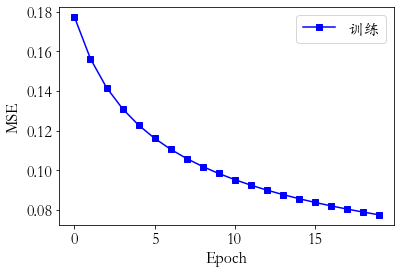

In [110]:
train(epochs=20)